## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9727294	total: 62.3ms	remaining: 1m 2s
1:	learn: 0.9403180	total: 63.1ms	remaining: 31.5s
2:	learn: 0.9128302	total: 63.5ms	remaining: 21.1s
3:	learn: 0.8819337	total: 64.2ms	remaining: 16s
4:	learn: 0.8569485	total: 64.7ms	remaining: 12.9s
5:	learn: 0.8284132	total: 65.9ms	remaining: 10.9s
6:	learn: 0.8057280	total: 66.1ms	remaining: 9.37s
7:	learn: 0.7825514	total: 66.3ms	remaining: 8.22s
8:	learn: 0.7564106	total: 66.6ms	remaining: 7.33s
9:	learn: 0.7327898	total: 66.8ms	remaining: 6.61s
10:	learn: 0.7098027	total: 67.1ms	remaining: 6.03s
11:	learn: 0.6890992	total: 67.3ms	remaining: 5.54s
12:	learn: 0.6673217	total: 68.5ms	remaining: 5.2s
13:	learn: 0.6484192	total: 69.5ms	remaining: 4.89s
14:	learn: 0.6279472	total: 69.7ms	remaining: 4.58s
15:	learn: 0.6094685	total: 70ms	remaining: 4.3s
16:	learn: 0.5902098	total: 70.2ms	remaining: 4.06s
17:	learn: 0.5730631	total: 71.1ms	remaining: 3.88s
18:	learn: 0.5561797	total: 71.5ms	remaining: 3.69s
19:	learn: 0.5396056	total: 

166:	learn: 0.0479608	total: 153ms	remaining: 761ms
167:	learn: 0.0477812	total: 154ms	remaining: 762ms
168:	learn: 0.0476183	total: 155ms	remaining: 760ms
169:	learn: 0.0474045	total: 155ms	remaining: 757ms
170:	learn: 0.0472324	total: 156ms	remaining: 754ms
171:	learn: 0.0470061	total: 156ms	remaining: 753ms
172:	learn: 0.0467471	total: 158ms	remaining: 758ms
173:	learn: 0.0465601	total: 159ms	remaining: 756ms
174:	learn: 0.0463918	total: 160ms	remaining: 753ms
175:	learn: 0.0462461	total: 160ms	remaining: 751ms
176:	learn: 0.0460828	total: 161ms	remaining: 750ms
177:	learn: 0.0459255	total: 162ms	remaining: 750ms
178:	learn: 0.0456871	total: 165ms	remaining: 755ms
179:	learn: 0.0454541	total: 165ms	remaining: 753ms
180:	learn: 0.0453083	total: 166ms	remaining: 750ms
181:	learn: 0.0450899	total: 166ms	remaining: 748ms
182:	learn: 0.0447982	total: 167ms	remaining: 745ms
183:	learn: 0.0446221	total: 167ms	remaining: 742ms
184:	learn: 0.0444504	total: 168ms	remaining: 740ms
185:	learn: 

235:	learn: 0.0377165	total: 194ms	remaining: 628ms
236:	learn: 0.0376039	total: 195ms	remaining: 627ms
237:	learn: 0.0374712	total: 196ms	remaining: 626ms
238:	learn: 0.0374266	total: 196ms	remaining: 624ms
239:	learn: 0.0373006	total: 196ms	remaining: 621ms
240:	learn: 0.0371421	total: 197ms	remaining: 620ms
241:	learn: 0.0369929	total: 197ms	remaining: 618ms
242:	learn: 0.0369507	total: 198ms	remaining: 617ms
243:	learn: 0.0368583	total: 198ms	remaining: 615ms
244:	learn: 0.0368142	total: 199ms	remaining: 613ms
245:	learn: 0.0367440	total: 199ms	remaining: 611ms
246:	learn: 0.0366429	total: 200ms	remaining: 610ms
247:	learn: 0.0365863	total: 201ms	remaining: 608ms
248:	learn: 0.0364685	total: 201ms	remaining: 606ms
249:	learn: 0.0364153	total: 202ms	remaining: 605ms
250:	learn: 0.0362305	total: 202ms	remaining: 603ms
251:	learn: 0.0361460	total: 202ms	remaining: 601ms
252:	learn: 0.0360712	total: 203ms	remaining: 599ms
253:	learn: 0.0358839	total: 203ms	remaining: 598ms
254:	learn: 

397:	learn: 0.0263297	total: 292ms	remaining: 442ms
398:	learn: 0.0262552	total: 293ms	remaining: 441ms
399:	learn: 0.0262304	total: 293ms	remaining: 440ms
400:	learn: 0.0261813	total: 294ms	remaining: 440ms
401:	learn: 0.0261398	total: 295ms	remaining: 439ms
402:	learn: 0.0260911	total: 295ms	remaining: 438ms
403:	learn: 0.0260700	total: 296ms	remaining: 436ms
404:	learn: 0.0260251	total: 296ms	remaining: 435ms
405:	learn: 0.0259604	total: 297ms	remaining: 434ms
406:	learn: 0.0259390	total: 298ms	remaining: 434ms
407:	learn: 0.0259047	total: 298ms	remaining: 432ms
408:	learn: 0.0258551	total: 299ms	remaining: 432ms
409:	learn: 0.0258332	total: 299ms	remaining: 430ms
410:	learn: 0.0258105	total: 300ms	remaining: 429ms
411:	learn: 0.0257738	total: 300ms	remaining: 428ms
412:	learn: 0.0257587	total: 301ms	remaining: 427ms
413:	learn: 0.0257211	total: 301ms	remaining: 426ms
414:	learn: 0.0257074	total: 301ms	remaining: 424ms
415:	learn: 0.0256447	total: 301ms	remaining: 423ms
416:	learn: 

482:	learn: 0.0234738	total: 336ms	remaining: 360ms
483:	learn: 0.0234392	total: 336ms	remaining: 359ms
484:	learn: 0.0234163	total: 339ms	remaining: 360ms
485:	learn: 0.0233929	total: 339ms	remaining: 359ms
486:	learn: 0.0233504	total: 340ms	remaining: 358ms
487:	learn: 0.0233301	total: 340ms	remaining: 357ms
488:	learn: 0.0233103	total: 340ms	remaining: 355ms
489:	learn: 0.0232987	total: 340ms	remaining: 354ms
490:	learn: 0.0232809	total: 342ms	remaining: 354ms
491:	learn: 0.0232621	total: 342ms	remaining: 353ms
492:	learn: 0.0232517	total: 342ms	remaining: 352ms
493:	learn: 0.0232077	total: 342ms	remaining: 351ms
494:	learn: 0.0231717	total: 343ms	remaining: 350ms
495:	learn: 0.0231574	total: 343ms	remaining: 349ms
496:	learn: 0.0231460	total: 343ms	remaining: 347ms
497:	learn: 0.0231297	total: 344ms	remaining: 346ms
498:	learn: 0.0230857	total: 344ms	remaining: 345ms
499:	learn: 0.0230677	total: 344ms	remaining: 344ms
500:	learn: 0.0230260	total: 344ms	remaining: 343ms
501:	learn: 

665:	learn: 0.0193786	total: 416ms	remaining: 209ms
666:	learn: 0.0193692	total: 416ms	remaining: 208ms
667:	learn: 0.0193579	total: 417ms	remaining: 207ms
668:	learn: 0.0193460	total: 422ms	remaining: 209ms
669:	learn: 0.0193366	total: 423ms	remaining: 208ms
670:	learn: 0.0193128	total: 423ms	remaining: 208ms
671:	learn: 0.0193007	total: 424ms	remaining: 207ms
672:	learn: 0.0192907	total: 424ms	remaining: 206ms
673:	learn: 0.0192829	total: 425ms	remaining: 205ms
674:	learn: 0.0192375	total: 425ms	remaining: 205ms
675:	learn: 0.0192252	total: 426ms	remaining: 204ms
676:	learn: 0.0191947	total: 426ms	remaining: 203ms
677:	learn: 0.0191792	total: 427ms	remaining: 203ms
678:	learn: 0.0191604	total: 427ms	remaining: 202ms
679:	learn: 0.0191504	total: 427ms	remaining: 201ms
680:	learn: 0.0191407	total: 428ms	remaining: 200ms
681:	learn: 0.0191250	total: 428ms	remaining: 199ms
682:	learn: 0.0191158	total: 428ms	remaining: 199ms
683:	learn: 0.0190958	total: 428ms	remaining: 198ms
684:	learn: 

745:	learn: 0.0179399	total: 461ms	remaining: 157ms
746:	learn: 0.0179055	total: 461ms	remaining: 156ms
747:	learn: 0.0178891	total: 461ms	remaining: 155ms
748:	learn: 0.0178619	total: 462ms	remaining: 155ms
749:	learn: 0.0178516	total: 462ms	remaining: 154ms
750:	learn: 0.0178353	total: 462ms	remaining: 153ms
751:	learn: 0.0178269	total: 463ms	remaining: 153ms
752:	learn: 0.0178145	total: 463ms	remaining: 152ms
753:	learn: 0.0177941	total: 463ms	remaining: 151ms
754:	learn: 0.0177861	total: 464ms	remaining: 150ms
755:	learn: 0.0177653	total: 464ms	remaining: 150ms
756:	learn: 0.0177367	total: 464ms	remaining: 149ms
757:	learn: 0.0177219	total: 465ms	remaining: 148ms
758:	learn: 0.0177146	total: 465ms	remaining: 148ms
759:	learn: 0.0176921	total: 466ms	remaining: 147ms
760:	learn: 0.0176721	total: 466ms	remaining: 146ms
761:	learn: 0.0176414	total: 466ms	remaining: 146ms
762:	learn: 0.0176325	total: 467ms	remaining: 145ms
763:	learn: 0.0176174	total: 467ms	remaining: 144ms
764:	learn: 

953:	learn: 0.0149703	total: 552ms	remaining: 26.6ms
954:	learn: 0.0149470	total: 552ms	remaining: 26ms
955:	learn: 0.0149352	total: 553ms	remaining: 25.4ms
956:	learn: 0.0149237	total: 553ms	remaining: 24.9ms
957:	learn: 0.0149174	total: 554ms	remaining: 24.3ms
958:	learn: 0.0149125	total: 554ms	remaining: 23.7ms
959:	learn: 0.0148986	total: 555ms	remaining: 23.1ms
960:	learn: 0.0148844	total: 555ms	remaining: 22.5ms
961:	learn: 0.0148743	total: 555ms	remaining: 21.9ms
962:	learn: 0.0148692	total: 556ms	remaining: 21.4ms
963:	learn: 0.0148593	total: 557ms	remaining: 20.8ms
964:	learn: 0.0148534	total: 557ms	remaining: 20.2ms
965:	learn: 0.0148446	total: 558ms	remaining: 19.6ms
966:	learn: 0.0148374	total: 558ms	remaining: 19ms
967:	learn: 0.0148237	total: 558ms	remaining: 18.5ms
968:	learn: 0.0148162	total: 559ms	remaining: 17.9ms
969:	learn: 0.0148098	total: 559ms	remaining: 17.3ms
970:	learn: 0.0148058	total: 559ms	remaining: 16.7ms
971:	learn: 0.0147992	total: 559ms	remaining: 16.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01895308191383547
ABC Pre-generator MAE 0.022465445859829535


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

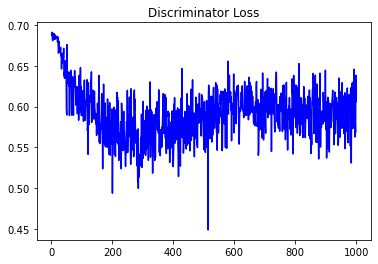

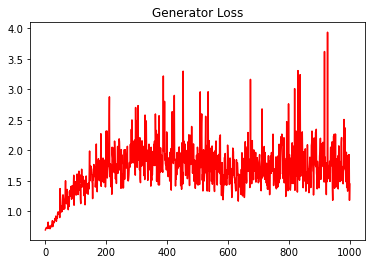

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.05190914797318446


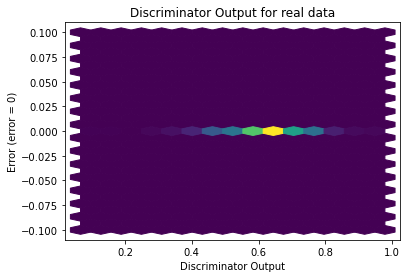

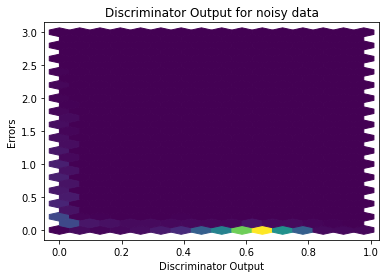

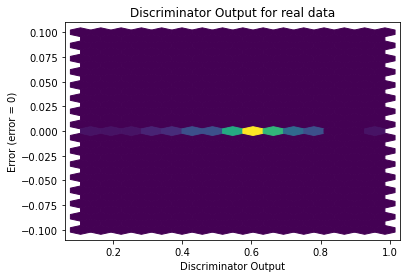

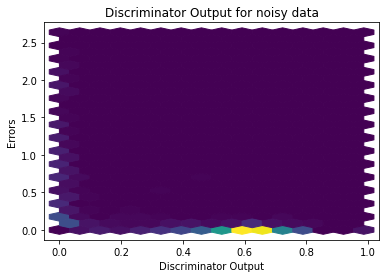

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


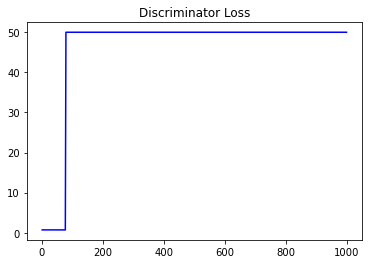

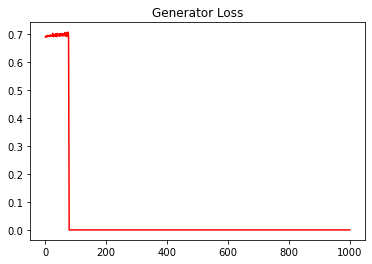

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
1048.8400036039639


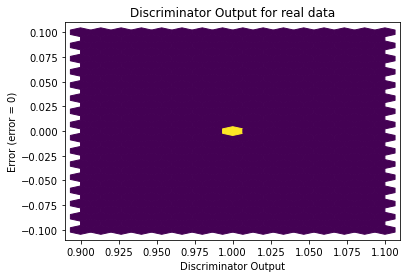

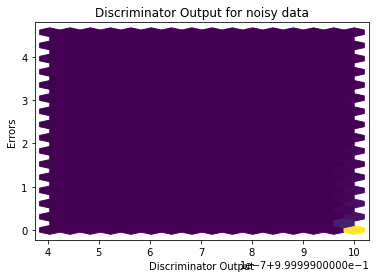

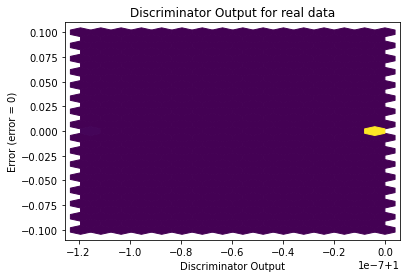

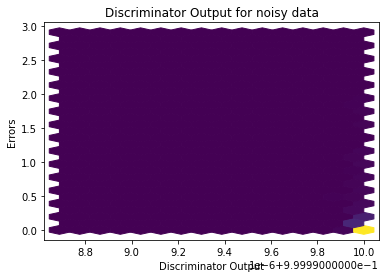

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


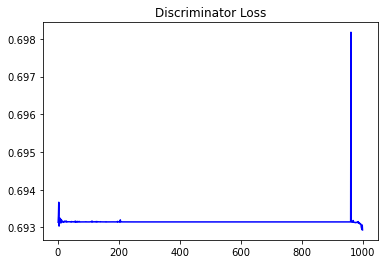

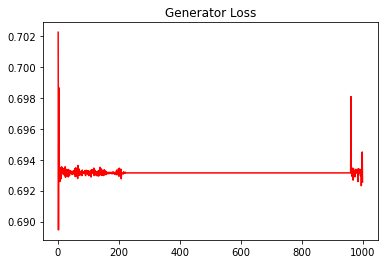

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.023349933361078237


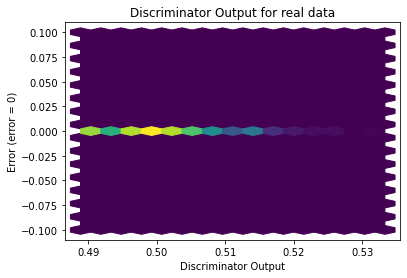

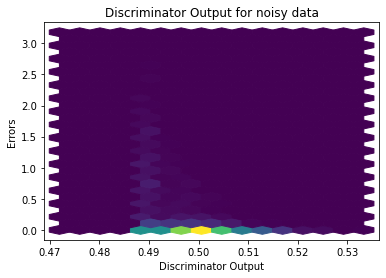

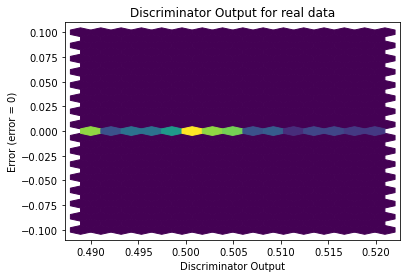

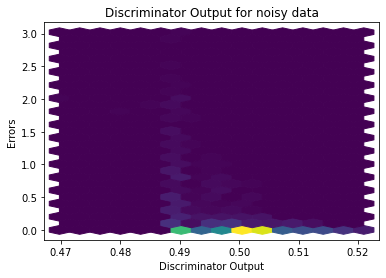

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0184]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
